In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [17]:
df = pd.read_csv('nyc_taxi_trip_duration.csv')
df.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848
5,id1918069,2,2016-02-14 18:31:42,2016-02-14 18:55:57,2,-73.993614,40.751884,-73.995422,40.723862,N,1455
6,id2429028,1,2016-04-20 20:30:14,2016-04-20 20:36:51,1,-73.965080,40.758915,-73.976807,40.764107,N,397
7,id1663798,2,2016-06-19 16:48:14,2016-06-19 17:06:35,1,-73.963890,40.765434,-73.872429,40.774200,N,1101
8,id2436943,2,2016-03-28 19:17:03,2016-03-28 19:48:29,2,-73.872887,40.774281,-73.979019,40.761879,N,1886
9,id2933909,1,2016-04-10 22:01:41,2016-04-10 22:25:30,1,-73.987823,40.740982,-73.999153,40.686451,N,1429


In [76]:
model=IsolationForest(n_estimators=150, max_samples='auto', contamination=float(0.05), max_features=1.0)
model.fit(df[['trip_duration']])


C:\Users\о_о\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.05, n_estimators=150)

In [77]:
df['scores']=model.decision_function(df[['trip_duration']])
df['anomaly']=model.predict(df[['trip_duration']])
df.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,scores,anomaly
421819,id2854272,2,2016-02-26 13:50:19,2016-02-26 13:58:38,2,-121.933342,37.389381,-121.933304,37.389511,N,499,0.175861,1
200522,id3628988,1,2016-05-05 18:21:37,2016-05-05 18:30:45,1,-79.569733,41.586273,-80.355431,42.090183,N,548,0.177958,1
267279,id1723416,1,2016-03-20 21:07:56,2016-03-20 21:12:35,1,-78.547401,40.817131,-79.786133,40.917637,N,279,0.142516,1
638951,id2769862,1,2016-02-06 15:43:15,2016-02-06 15:50:12,1,-77.896019,37.777771,-77.896019,37.777771,N,417,0.170714,1
423484,id3301642,2,2016-05-19 12:53:00,2016-05-19 12:54:00,1,-77.039436,38.898849,-77.039436,38.898849,N,60,-0.019602,-1


In [78]:
an = df.loc[df['anomaly']==-1]
an.sort_values(by=['trip_duration'])

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,scores,anomaly
512833,id2697717,2,2016-03-27 12:55:52,2016-03-27 12:55:53,2,-73.983154,40.767159,-73.983238,40.767097,N,1,-0.061993,-1
119181,id2517984,1,2016-01-09 00:28:55,2016-01-09 00:28:56,1,-73.861961,40.768559,-73.861961,40.768559,N,1,-0.061993,-1
533760,id0948644,2,2016-02-22 00:40:25,2016-02-22 00:40:26,0,-73.987595,40.719997,-73.987595,40.720005,N,1,-0.061993,-1
622664,id0550194,1,2016-04-20 23:15:08,2016-04-20 23:15:09,1,-73.986282,40.750034,-73.986237,40.750088,N,1,-0.061993,-1
70318,id0553321,2,2016-04-11 19:01:35,2016-04-11 19:01:36,1,-73.945999,40.792202,-73.947411,40.792740,N,1,-0.061993,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
496391,id2307896,2,2016-05-14 04:48:05,2016-05-15 04:47:42,1,-74.000504,40.732121,-73.994202,40.712418,N,86377,-0.269143,-1
177225,id3782820,2,2016-05-12 13:48:19,2016-05-13 13:47:57,1,-73.781990,40.644722,-73.980675,40.724918,N,86378,-0.269143,-1
119185,id2837671,2,2016-06-30 16:37:52,2016-07-01 16:37:39,1,-73.992279,40.749729,-73.962524,40.800770,N,86387,-0.269143,-1
259437,id0593332,2,2016-05-31 13:00:39,2016-06-01 13:00:30,1,-73.781952,40.644688,-73.993874,40.745926,N,86391,-0.269143,-1


C:\Users\о_о\AppData\Local\Temp\ipykernel_13068\3157799113.py:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.xlim([df.quantile(.93).pickup_longitude, df.quantile(.001).pickup_longitude])


AttributeError: 'DataFrame' object has no attribute 'pickup_longitude'

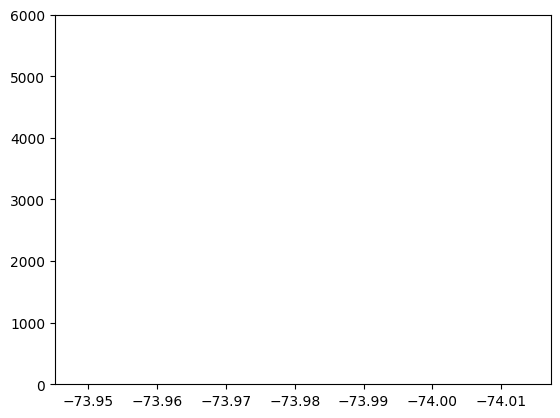

In [181]:
default = df.loc[df['anomaly']==1]

df = df.sort_values(by=['pickup_longitude'])
plt.xlim([df.quantile(.93).pickup_longitude, df.quantile(.001).pickup_longitude])
plt.ylim([0, 6000])
plt.scatter(an.pickup_longitude, an.trip_duration, c='red', s=0.01)
plt.scatter(default.pickup_longitude, default.trip_duration, c='blue', s=0.01)


In [51]:
print(float(df.quantile(.9).pickup_longitude))

print(float(df.quantile(.1).pickup_longitude))


-73.95187377929686
-74.00266265869139


C:\Users\о_о\AppData\Local\Temp\ipykernel_13068\3417116435.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(float(df.quantile(.9).pickup_longitude))
C:\Users\о_о\AppData\Local\Temp\ipykernel_13068\3417116435.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(float(df.quantile(.1).pickup_longitude))


In [177]:
def plot_by_field(FIELD, n_estimators, contamination):
    df = pd.read_csv('nyc_taxi_trip_duration.csv')
    model=IsolationForest(n_estimators=n_estimators, max_samples='auto', contamination=contamination, max_features=1.0)
    model.fit(df[[FIELD]])
    df['scores']=model.decision_function(df[[FIELD]])
    df['anomaly']=model.predict(df[[FIELD]])
    
    an = df.loc[df['anomaly']==-1]
    an.sort_values(by=[FIELD])
    
    default = df.loc[df['anomaly']==1]
    
    df = df.sort_values(by=['pickup_longitude'])
    plt.xlim([df.quantile(.96).pickup_longitude, df.quantile(.001).pickup_longitude])
    
    df = df.sort_values(by=[FIELD])
    plt.ylim([df.quantile(.001)[FIELD], df.quantile(.99)[FIELD],])
    
    plt.scatter(an.pickup_longitude, an[FIELD], c='red', s=0.01)
    plt.scatter(default.pickup_longitude, default[FIELD], c='blue', s=0.01)


C:\Users\о_о\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\о_о\AppData\Local\Temp\ipykernel_13068\1443874274.py:14: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.xlim([df.quantile(.96).pickup_longitude, df.quantile(.001).pickup_longitude])
C:\Users\о_о\AppData\Local\Temp\ipykernel_13068\1443874274.py:17: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.ylim([df.quantile(.001)[FIELD], df.quantile(.99)[FIELD],])


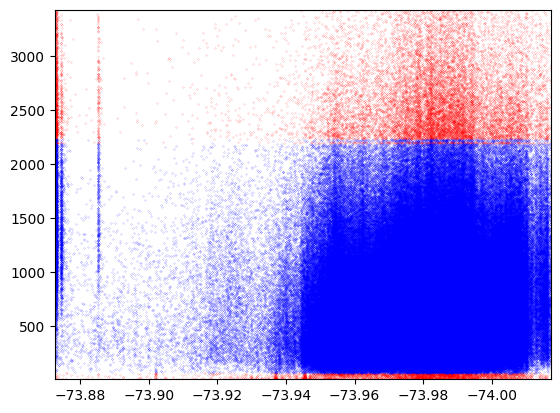

In [178]:
plot_by_field(FIELD='trip_duration', n_estimators=100, contamination=float(0.05))

<Axes: xlabel='pickup_datetime'>

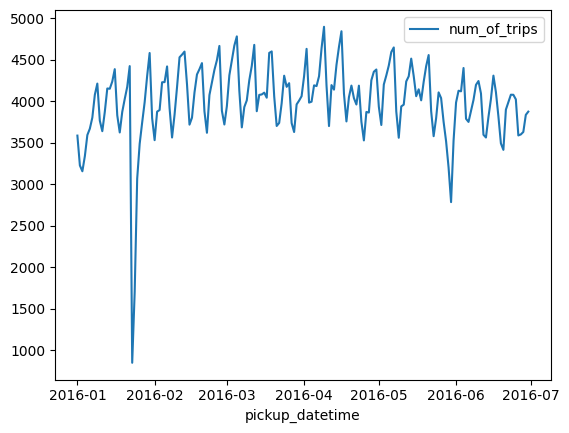

In [128]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['pickup_datetime'][0].date

# pd.pivot_table(df, index=['pickup_datetime'], columns=['pickup_datetime'], values=['passenger_count'], aggfunc='count')
date_df = df.groupby([df['pickup_datetime'].dt.date]).count().drop(columns=['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration', 'scores', 'anomaly']).rename(columns={'id': 'num_of_trips'})
date_df.plot()

C:\Users\о_о\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,num_of_trips,scores,anomaly
pickup_datetime,,,
2016-01-01,3588,0.147518,1
2016-01-05,3595,0.147205,1
2016-01-06,3672,0.118244,1
2016-01-07,3805,0.164046,1
2016-01-08,4080,0.186690,1
...,...,...,...
2016-06-26,3590,0.148862,1
2016-06-27,3602,0.141133,1
2016-06-28,3632,0.143521,1


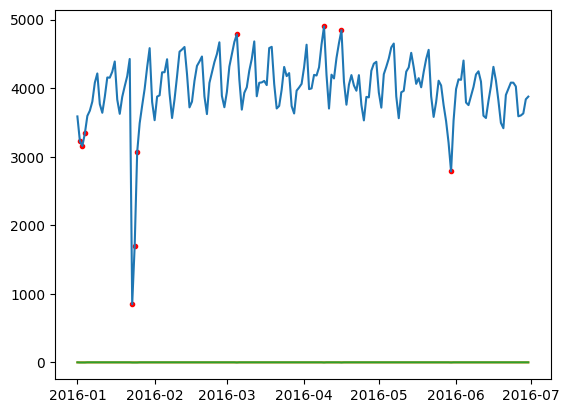

In [180]:

model=IsolationForest(n_estimators=150, max_samples='auto', contamination=float(0.05), max_features=1.0)
model.fit(date_df[['num_of_trips']])
date_df['scores']=model.decision_function(date_df[['num_of_trips']])
date_df['anomaly']=model.predict(date_df[['num_of_trips']])

an = date_df.loc[date_df['anomaly']==-1]
an.index
an.sort_values(by=['num_of_trips'])

default = date_df.loc[date_df['anomaly']==1]
default

plt.plot(date_df)
plt.scatter(an.index, an['num_of_trips'], c='red', s=9)

# df = df.sort_values(by=['pickup_longitude'])
# plt.xlim([df.quantile(.93).pickup_longitude, df.quantile(.001).pickup_longitude])

# df = df.sort_values(by=[FIELD])
# plt.ylim([df.quantile(.001)[FIELD], df.quantile(.99)[FIELD],])

# plt.scatter(an.pickup_longitude, an[FIELD], c='red', s=0.01)
# plt.scatter(default.pickup_longitude, default[FIELD], c='blue', s=0.01)
